# Import all the Dependencies

In [ ]:
import tensorflow as  tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

# Set all the Constants

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

# Import data into tensorflow dataset object

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 4500 files belonging to 3 classes.


# Checking the classes

In [ ]:
 class_names=dataset.class_names
class_names

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [ ]:
len(dataset)

141

# Visualise the sample images

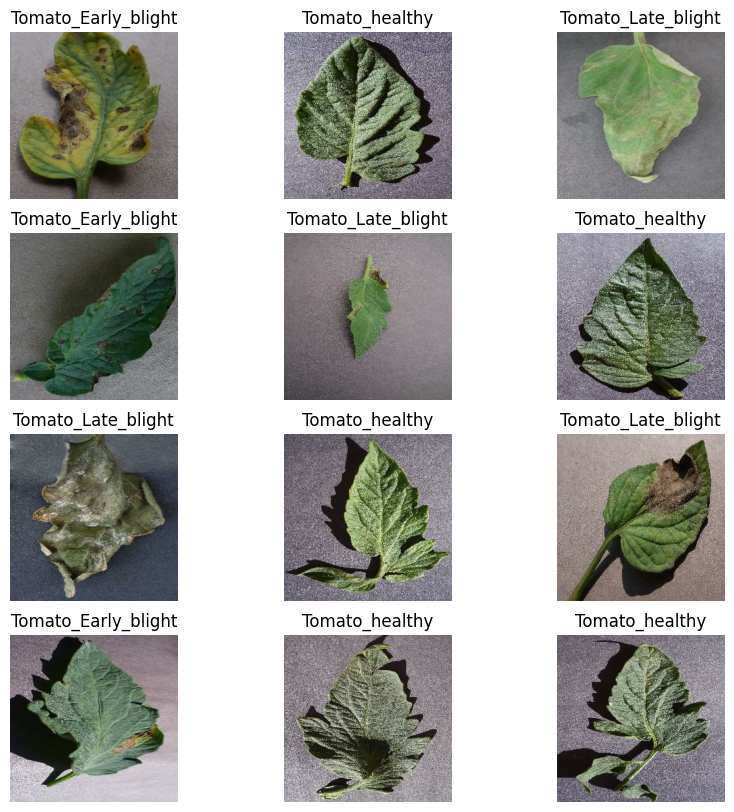

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in  range(12):
        plt.subplot(4,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    #print(label_batch.numpy())

# Split the data

1)Training: Dataset to be used while training
2)Validation: Dataset to be tested against while training
3)Test: Dataset to be tested against after we trained a model

In [ ]:
train_ds=0.8
len(dataset)*train_ds

In [ ]:
train_ds=dataset.take(112)
len(train_ds)

test_ds=dataset.skip(112)
len(test_ds)

val_size=0.1
len(dataset)*val_size

val_ds=test_ds.take(14)
len(val_ds)

test_ds=test_ds.skip(14)
len(test_ds)



15

In [ ]:
def get_dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split * ds_size)
    val_size=int(val_split * ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions(dataset)

In [ ]:
len(train_ds),len(test_ds),len(val_ds)

(112, 15, 14)

# Cache, Shuffle, and Prefetch the Dataset

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the Model

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(120,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(120,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(120,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(120,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(120,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(120,activation="relu"),
    layers.Dense(n_classes,activation="softmax")

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 120)       34680     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 120)        0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
112/112 [==============================] - 12s 109ms/step - loss: 0.3347 - accuracy: 0.8645 - val_loss: 0.3631 - val_accuracy: 0.8485
Epoch 2/50
112/112 [==============================] - 12s 110ms/step - loss: 0.3348 - accuracy: 0.8653 - val_loss: 0.3124 - val_accuracy: 0.8651
Epoch 3/50
112/112 [==============================] - 12s 110ms/step - loss: 0.2811 - accuracy: 0.8841 - val_loss: 0.4140 - val_accuracy: 0.8161
Epoch 4/50
112/112 [==============================] - 12s 111ms/step - loss: 0.2584 - accuracy: 0.8950 - val_loss: 0.2940 - val_accuracy: 0.8961
Epoch 5/50
112/112 [==============================] - 12s 109ms/step - loss: 0.2306 - accuracy: 0.9079 - val_loss: 0.5749 - val_accuracy: 0.8233
Epoch 6/50
112/112 [==============================] - 14s 128ms/step - loss: 0.2238 - accuracy: 0.9124 - val_loss: 0.4574 - val_accuracy: 0.8561
Epoch 7/50
112/112 [==============================] - 12s 109ms/step - loss: 0.2117 - accuracy: 0.9202 - val_loss: 0.3917 - val_ac

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Ploting the Accurarcy and Loss

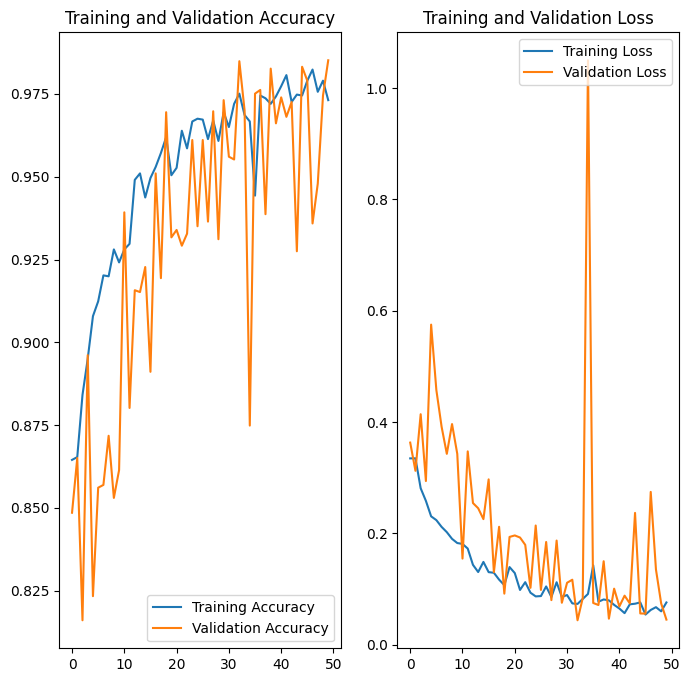

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#plt.savefig('Accuracy.png')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Running prediction on a sample image

first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 0s 35ms/step
predicted label: Tomato_healthy


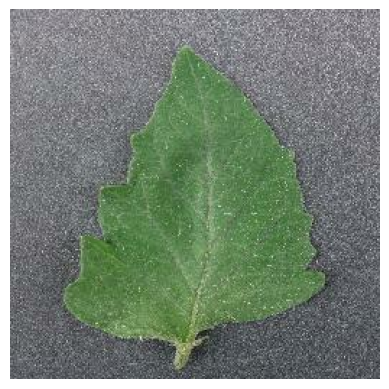

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [ ]:
scores = model.evaluate(test_ds)
scores

112/112 [==============================] - 3s 29ms/step - loss: 0.0451 - accuracy: 0.9852


[0.04514114558696747, 0.9851623773574829]

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


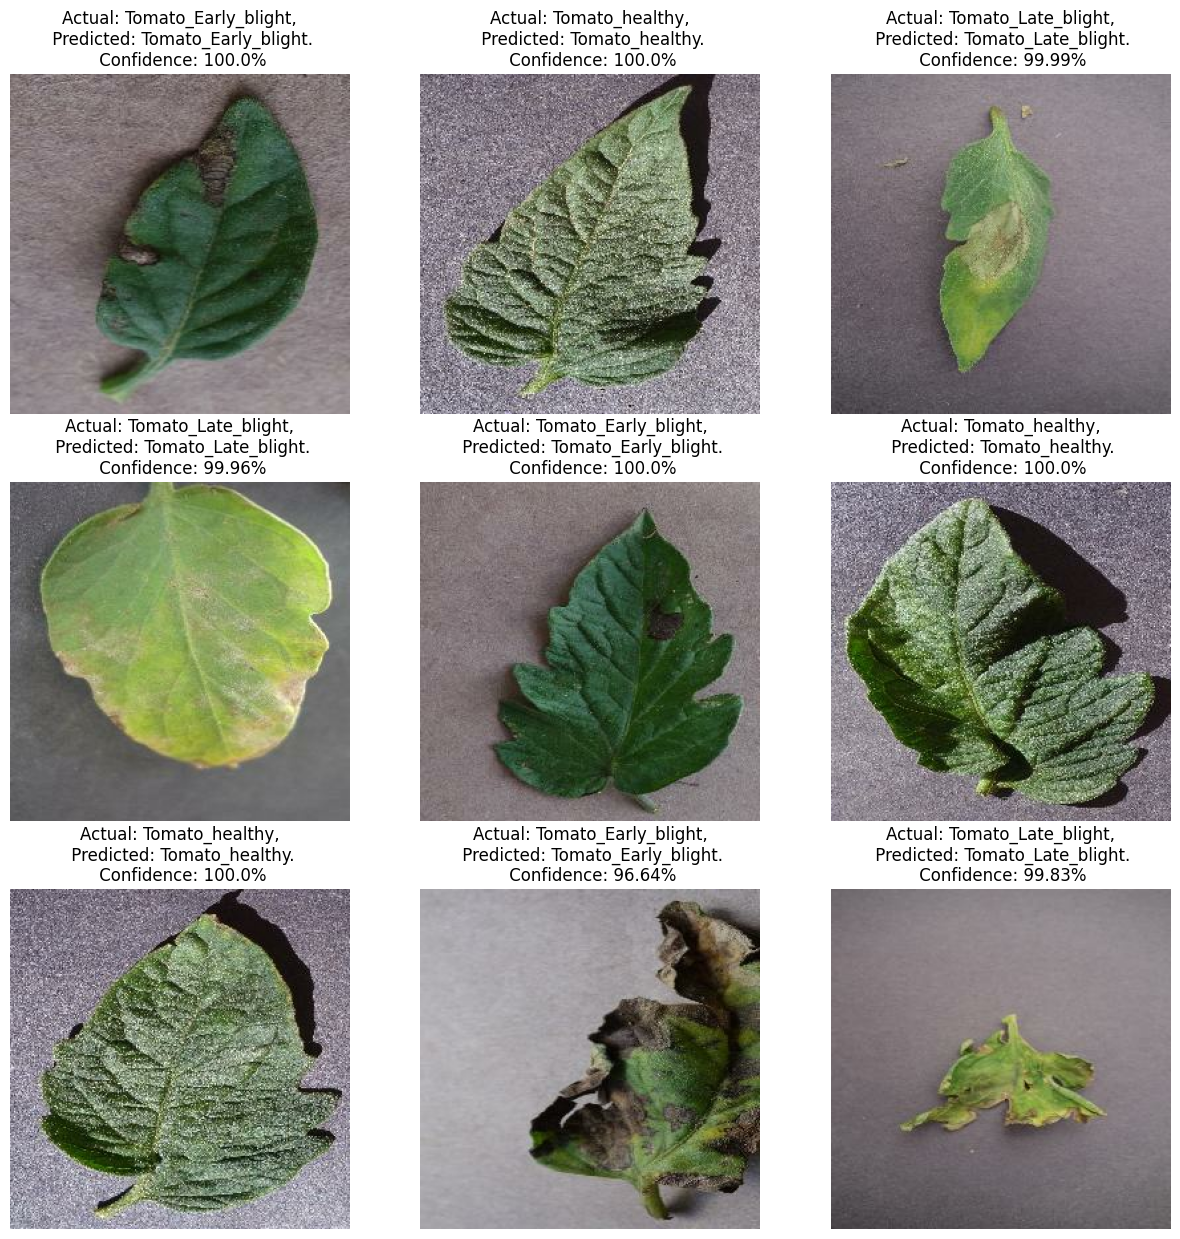

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

# Saving the model

In [ ]:
model.save("tomatoes.h5")